In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
from scipy.integrate import odeint, solve_ivp
from scipy.ndimage.filters import laplace
from scipy.special import erf
from scipy.optimize import curve_fit
from math import sqrt
import pandas as pd
import seaborn as sns
from itertools import cycle

In [2]:
df = pd.read_excel('elife-63910-supp1-v2.xlsx', sheet_name='Fitness_Data')

In [3]:
generations = [70, 550, 1410, 2640, 3630, 5150, 7530, 10150]
generations_c = cycle(generations)

In [4]:
df2 = pd.concat([df]*len(generations), ignore_index=True)

In [5]:
df2['generation'] = [next(generations_c) for _ in range(len(df2))]

In [6]:
for p in df.platewell:
    for g in generations:
        df2.loc[(df2.platewell == p) & (df2.generation == g), 'fitness'] = df.loc[df.platewell == p]['Gen'+str(g)+'_s']

In [7]:
gen_fixer = {70: {'P1': 70, 'P2': 70, 'P3': 56, 'P4': 70},
             550: {'P1': 560, 'P2': 560, 'P3': 448, 'P4': 560},
             1410: {'P1': 1410, 'P2': 1410, 'P3': 1128, 'P4': 1410},
             2640: {'P1': 2640, 'P2': 2640, 'P3': 2106, 'P4': 2640},
             3630: {'P1': 3660, 'P2': 3660, 'P3': 2922, 'P4': 3660},
             5150: {'P1': 5170, 'P2': 5170, 'P3': 4130, 'P4': 5170},
             7530: {'P1': 7550, 'P2': 7560, 'P3': 6042, 'P4': 7560},
             10150: {'P1': 10190, 'P2': 10200, 'P3': 8098, 'P4': 10200}}

In [8]:
for p in ['P{}'.format(i) for i in range(1, 5)]:
    df2.loc[df2.Plate == p, 'true_generation'] = df2.loc[df2.Plate == p, 'generation'].apply(lambda x: gen_fixer[x][p])

In [9]:
df2.head()

,platewell,Plate,Well,Gen70_s_R1,Gen70_s_R2,Gen70_s,Gen70_s_scaled,Gen550_s_R1,Gen550_s_R2,Gen550_s,...,Gen7530_s_R2,Gen7530_s,Gen7530_s_scaled,Gen10150_s_R1,Gen10150_s_R2,Gen10150_s,Gen10150_s_scaled,generation,fitness,true_generation
0,P1A01,P1,A01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,NaN,70.0
1,P1A02,P1,A02,-0.075306,-0.062071,-0.068689,-0.072925,-0.063589,-0.055622,-0.059606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,-0.059606,560.0
2,P1A03,P1,A03,-0.077027,-0.076459,-0.076743,-0.080979,-0.046321,-0.042535,-0.044428,...,0.012947,0.010603,0.006367,0.014491,0.011513,0.013002,0.005710,1410,-0.024356,1410.0
3,P1A04,P1,A04,-0.071582,-0.080952,-0.076267,-0.080503,-0.052351,-0.056217,-0.054284,...,0.048179,0.049347,0.045111,0.032640,0.032965,0.032803,0.025511,2640,-0.002444,2640.0
4,P1A05,P1,A05,-0.083521,-0.075293,-0.079407,-0.083643,-0.042366,-0.038459,-0.040412,...,0.027544,0.027449,0.023213,0.032051,0.021394,0.026722,0.019430,3630,0.007021,3660.0


<AxesSubplot:xlabel='true_generation', ylabel='fitness'>

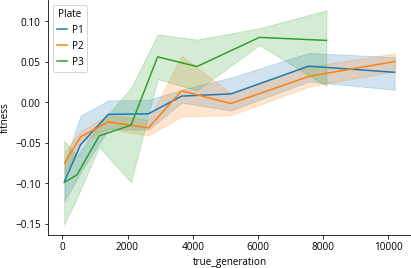

In [10]:
sns.lineplot(data=df2.dropna(), x='true_generation', y='fitness', hue='Plate')

In [11]:
ydata = df2.loc[df2.Plate == 'P2'].groupby('true_generation').fitness.mean()

In [12]:
ydata

true_generation
70.0      -0.073846
560.0     -0.042730
1410.0    -0.027784
2640.0    -0.035495
3660.0     0.006433
5170.0    -0.001623
7560.0     0.031959
10200.0    0.048755
Name: fitness, dtype: float64

Next: compare with theoretical predictions!